In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

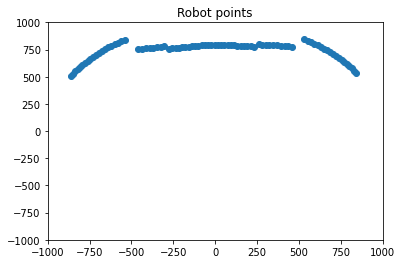

In [4]:
# reading robot's inputs
points=np.loadtxt('data_sonar.dat',delimiter=',')
plt.scatter(points[:,0], points[:,1])
plt.title('Robot points')
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.show()

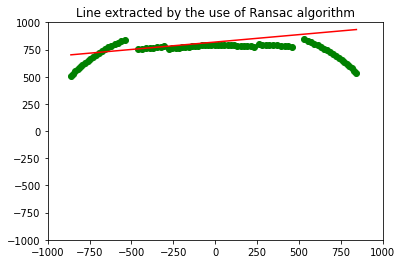

In [8]:
# these two numbers are based on trial and error
numberOfIterations = 1000000
tolerance = 0.075
max_inlier = 0
optimal_coefficients = []

for iteration in range(0, numberOfIterations):
    # Generating random indices 
    index1 = random.randint(0, len(points)-1)
    index2 = random.randint(0, len(points)-1)
    while index1 == index2:
        index1 = random.randint(0,len(points)-1)

    #find the coefficients for the line
    #line equation : A*X + B*Y + C = 0   A = y1 - y2   B = x2 - x1   C = x1*y2 - x2*y1
    x1 = points[index1][0]
    x2 = points[index2][0]
    y1 = points[index1][1]
    y2 = points[index2][1]
    A = y1 - y2
    B = x2 - x1
    C = x1*y2 - x2*y1
    
    # finding inlier points
    inlier = 0
    for i in range(0, len(points)):
        # distance function =>  |Ax1 + By1 + C|/sqrt(A^2 + B^2)
        distance = abs(A*points[i][0] + B*points[i][1] + C)/(pow(A*A + B*B, 0.5))
        if distance < tolerance:
            inlier += 1
    # better line is found
    if inlier > max_inlier:
        optimal_coefficients = [A, B, C]
        max_inlier = inlier

# scatter the input values in green
plt.scatter(points[:,0], points[:,1], color="green")
A = optimal_coefficients[0]
B = optimal_coefficients[1]
C = optimal_coefficients[2]

# ploting the result in red based on the coefficients 
x_vals = [point[0] for point in points]

x_range = [min(x_vals), max(x_vals)]
# line equation
y_range = [(-C-A*x_range[0])/B, (-C-A*x_range[1])/B]

plt.plot(x_range, y_range, color="red")
plt.title('Line extracted by the use of Ransac algorithm')
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)
plt.show()
